# Logistic Regression for Banking Predictions

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('../datasets/bank/bank.csv',sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [7]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [9]:
# Pasamos de columna y con Yes No a 1 o 0
data.loc[data['y']=='yes','y'] = 1
data.loc[data['y']=='no','y'] = 0

In [16]:
data['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

In [20]:
# Agrupamos Basic Education
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
# Renombramos
data['education'] = np.where(data['education'] == 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University Degree', data['education'])
data['education'] = np.where(data['education'] == 'illiterate', 'Illitirate', data['education'])
data['education'] = np.where(data['education'] == 'unknown', 'Unknown', data['education'])
data['education'].value_counts()

University Degree      1264
Basic                  1231
High School             921
Professional Course     535
Unknown                 167
Illitirate                1
Name: education, dtype: int64

### Analysis

Input variables:
###### bank client data:
1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')
###### related with the last contact of the current campaign:
8. - contact: contact communication type (categorical: 'cellular','telephone')
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
###### other attributes:
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
###### social and economic context attributes
16. - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. - cons.price.idx: consumer price index - monthly indicator (numeric)
18. - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. - euribor3m: euribor 3 month rate - daily indicator (numeric)
20. - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [22]:
# Muchos usuarios no compran el producto
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [23]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


- Quien compra tiene una media de edad superior a quien no compra
- pdays: días desde que el cliente fue contactado por última vez es tb determinante
- Campañas...

In [24]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illitirate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


### Visualization

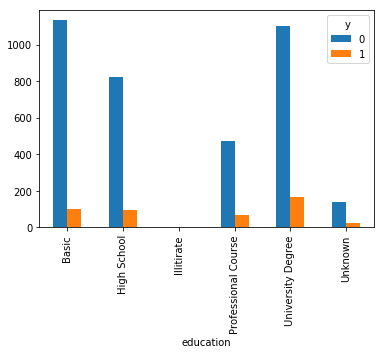

In [31]:
# Quien más compra son los universitarios
pd.crosstab(data['education'], data['y']).plot(kind='bar');

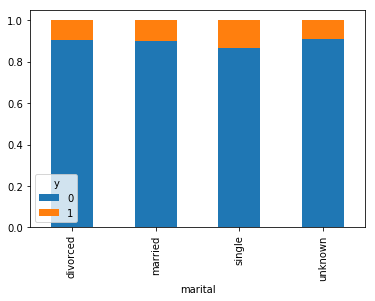

In [47]:
# En porcentaje no tenemos un valor representativo de si el estado civil es un factor predominante para realizar la compra
marital = pd.crosstab(data['marital'], data['y'])
suma = marital.sum(1).astype(float)
marital.div(suma,axis=0).plot(kind='bar', stacked=True);

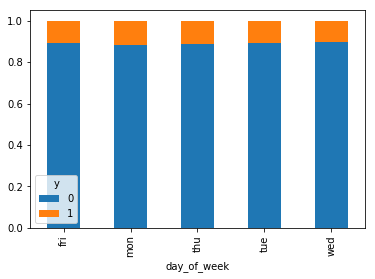

In [49]:
# En porcentaje no tenemos un valor representativo de si el día de la semana es un factor predominante para realizar la compra
week = pd.crosstab(data['day_of_week'], data['y'])
suma = week.sum(1).astype(float)
week.div(suma,axis=0).plot(kind='bar', stacked=True);

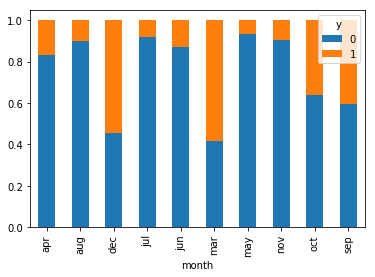

In [50]:
month = pd.crosstab(data['month'], data['y'])
suma = month.sum(1).astype(float)
month.div(suma,axis=0).plot(kind='bar', stacked=True);

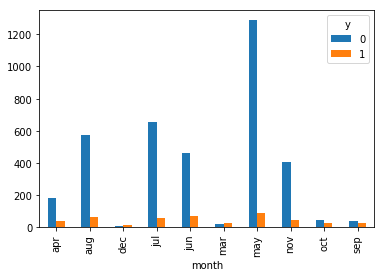

In [53]:
month = pd.crosstab(data['month'], data['y'])
month.plot(kind='bar', stacked=False);

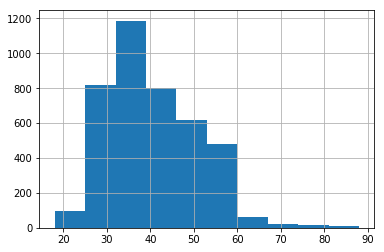

In [55]:
data['age'].hist();

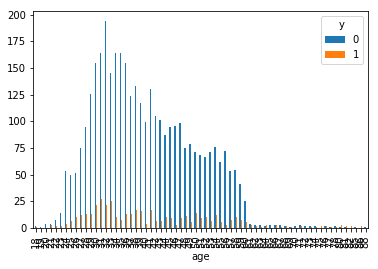

In [59]:
age = pd.crosstab(data['age'], data['y'])
age.plot(kind='bar');

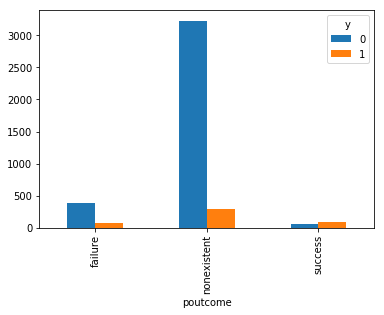

In [60]:
poutcome = pd.crosstab(data['poutcome'], data['y'])
poutcome.plot(kind='bar');